<a href="https://colab.research.google.com/github/MauroTalamantes/DeteccionBordesSobelPrewittRoberts/blob/main/DeteccionBordesSobelPrewittRoberts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

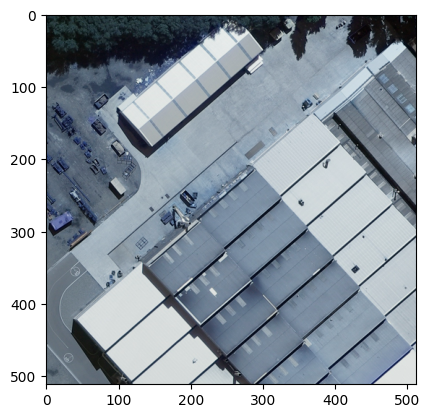

In [ ]:
img_bgr = cv2.imread('/content/drive/MyDrive/Colab Notebooks/0_104.tif')
plt.imshow(img_bgr)
plt.show()

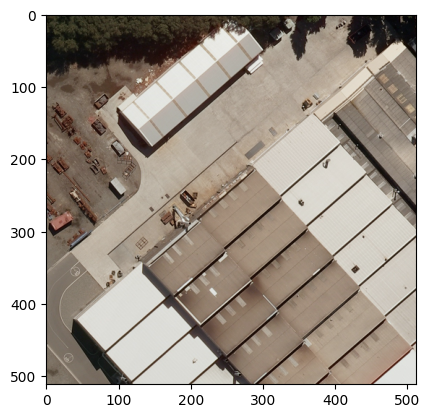

In [ ]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

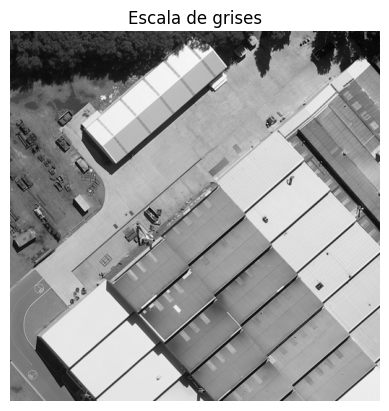

In [ ]:
# Paso 1:
gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

# Visualización
plt.imshow(gray, cmap = 'gray')
plt.title("Escala de grises")
plt.axis('off')
plt.show()

In [ ]:
# Paso 2:
# Aplicar el filtro de Sobel
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3) # Detecta bordes verticales (cambios de intensidad de izquierda a derecha)

#cv2.CV_64F - float64
# 1, orden de derivada en eje X
# 0, orden de derivada en eje Y
# kernel = 3, 5, 7

sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3) # Detecta bordes horizontales (cambios de intensidad de arriba a abajo)

# Magnitud del gradiente
sobel_magnitud = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_magnitud = np.uint8(np.clip(sobel_magnitud, 0, 255))

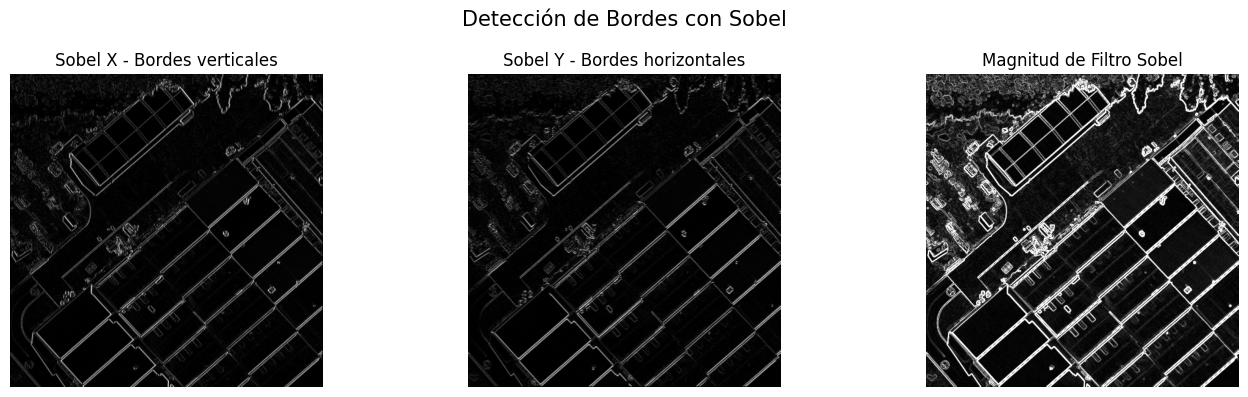

In [ ]:
# Paso 3:
# Visualización de resultados

plt.figure(figsize = (14, 4))

plt.subplot(1, 3, 1)
plt.imshow(np.abs(sobel_x), cmap = 'gray')
plt.title('Sobel X - Bordes verticales')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(np.abs(sobel_y), cmap = 'gray')
plt.title('Sobel Y - Bordes horizontales')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(sobel_magnitud, cmap = 'gray')
plt.title('Magnitud de Filtro Sobel')
plt.axis('off')

plt.suptitle('Detección de Bordes con Sobel', fontsize = 15)
plt.tight_layout()
plt.show()

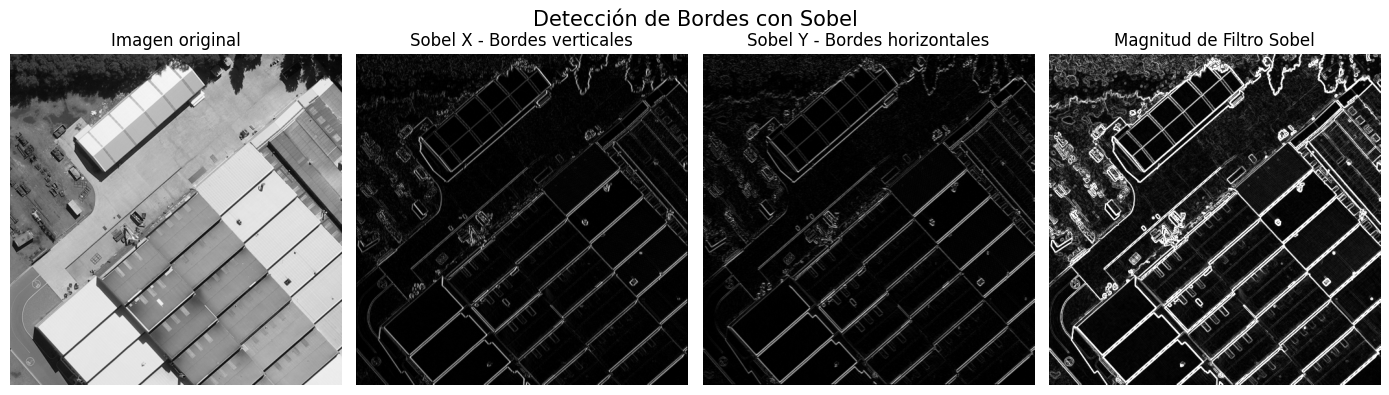

In [ ]:
plt.figure(figsize = (14, 4))

plt.subplot(1, 4, 1)
plt.imshow(gray, cmap = 'gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(np.abs(sobel_x), cmap = 'gray')
plt.title('Sobel X - Bordes verticales')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(np.abs(sobel_y), cmap = 'gray')
plt.title('Sobel Y - Bordes horizontales')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(sobel_magnitud, cmap = 'gray')
plt.title('Magnitud de Filtro Sobel')
plt.axis('off')

plt.suptitle('Detección de Bordes con Sobel', fontsize = 15)
plt.tight_layout()
plt.show()

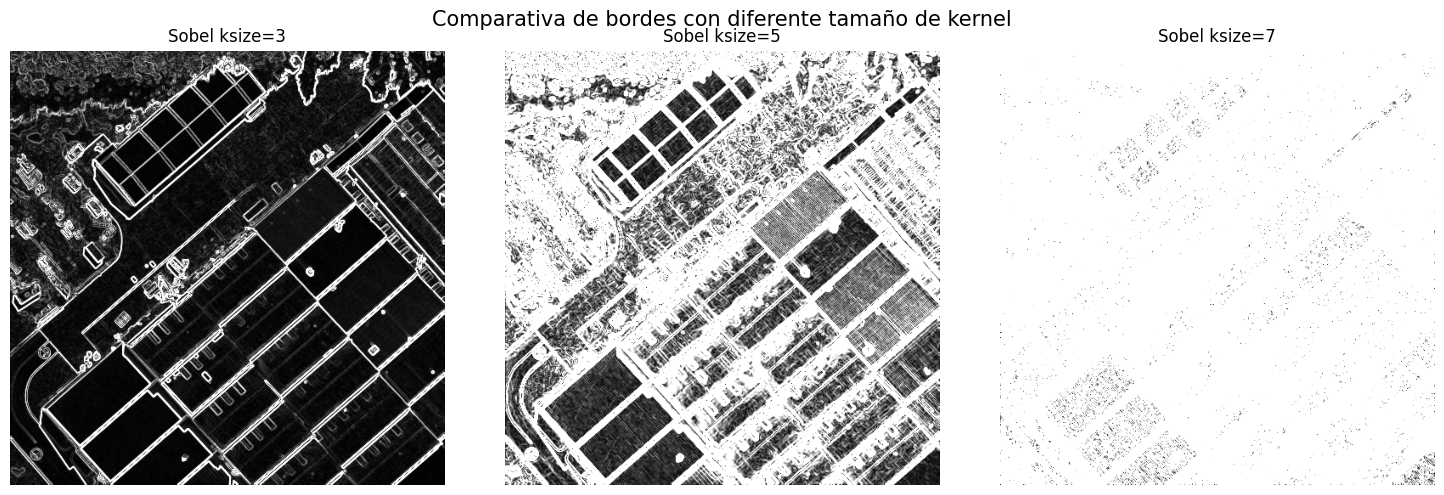

In [ ]:
# Experimentación
# Aplicar sobel con distintos tamaños de kernel

ksizes = [3, 5, 7]
sobel_results = []

for k in ksizes:
  sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=k)
  sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=k)
  sobel_mag = np.sqrt(sobel_x**2 + sobel_y**2)
  sobel_mag = np.uint8(np.clip(sobel_mag, 0, 255))
  sobel_results.append(sobel_mag)

plt.figure(figsize=(15, 5))
for i, (k, result) in enumerate(zip(ksizes, sobel_results)):
  plt.subplot(1, 3, i+1)
  plt.imshow(result, cmap = 'gray')
  plt.title(f'Sobel ksize={k}')
  plt.axis('off')
plt.suptitle('Comparativa de bordes con diferente tamaño de kernel', fontsize = 15)
plt.tight_layout()
plt.show()

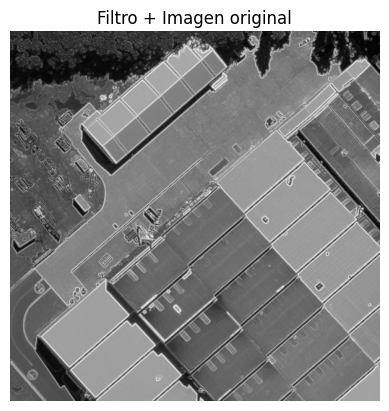

In [ ]:
overlay = cv2.addWeighted(gray, 0.7, sobel_magnitud, 0.3, 0)
plt.imshow(overlay, cmap = 'gray')
plt.title('Filtro + Imagen original')
plt.axis('off')
plt.show()

# cv2.addWeighted - combinación lineal ponderada de dos imágenes (crear un efecto de superposición o fusión visual)
# overlay(x,y) = 0.7*gray(x,y) + 0.3*sobel_magnitud(x,y)
# addWeighted(src1, alpha, src2, beta, gamma)
# src1 - gray
# alpha - 0.7
# src2 - sobel_magnitud
# beta - 0.3
# gamma - 0

# 0.7 - preservar el 70% de la intensidad original
# 0.3 - se añade un 30% del valor de los bordes
# 0 - no se altera con un valor adicional (bias = 0)

# Ejemplo
# Alpha = 1.0 | 0.0 = I.Original
# 0.0         | 1.0 = Solo los bordes
# 0.5         | 0.5 = ambas mitades
# 0.3         | 0.7 = bordes resaltados con menor detalle original

# alpha + beta = 255

In [ ]:
!pip install ipywidgets --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.3 MB/s eta 0:00:00


In [ ]:
from ipywidgets import interact, FloatSlider

In [ ]:
# Paso 1: Imagen en escala de grises
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/0_104.tif', cv2.IMREAD_GRAYSCALE)

# Paso 2: Calcular Bordes con Sobel
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
sobel_magnitud = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_magnitud = np.uint8(np.clip(sobel_magnitud, 0, 255))

# Paso 3: Función para superponer bordes
def mostrar_superposicion(alpha=0.7, beta =0.3):
  overlay = cv2.addWeighted(img, alpha, sobel_magnitud, beta, 0)
  plt.figure(figsize=(5,5))
  plt.imshow(overlay, cmap = 'gray')
  plt.title(f'Superposición\α = {alpha}, β = {beta}')
  plt.axis('off')
  plt.show()

interact(mostrar_superposicion,
         alpha = FloatSlider(min = 0, max = 1, step = 0.1, value = 0.7, description = 'Alpha'),
         beta = FloatSlider(min = 0, max = 1, step = 0.1, value = 0.3, description = 'Beta'))

interactive(children=(FloatSlider(value=0.7, description='Alpha', max=1.0), FloatSlider(value=0.3, description…

<function __main__.mostrar_superposicion(alpha=0.7, beta=0.3)>

In [ ]:
# Prewitt
from scipy.ndimage import convolve

# Imagen en escala de grises
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/0_104.tif', cv2.IMREAD_GRAYSCALE)

# Definir los kernels
kernel_prewitt_x = np.array([[-1, 0, 1],
                             [-1, 0, 1],
                             [-1, 0, 1]])

kernel_prewitt_y = np.array([[-1, -1, -1],
                             [ 0, 0, 0],
                             [1, 1, 1]])
# Aplicar la convolución
prewitt_x = convolve(img.astype(np.float32), kernel_prewitt_x)
prewitt_y = convolve(img.astype(np.float32), kernel_prewitt_y)

# Calcular la magnitud del gradiente
prewitt_magnitude = np.sqrt(prewitt_x**2 + prewitt_y**2)
prewitt_magnitude = np.uint8(np.clip(prewitt_magnitude, 0, 255))

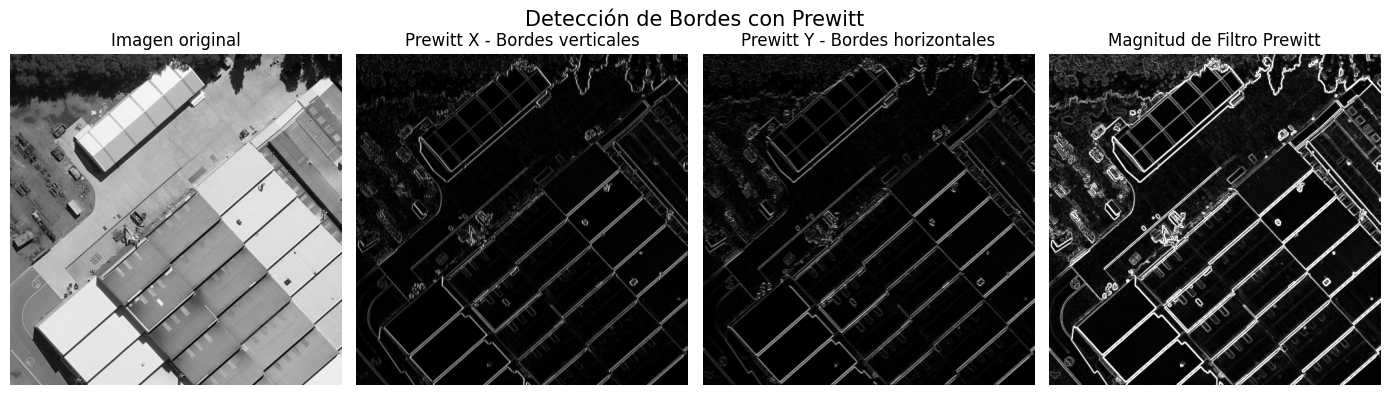

In [ ]:
plt.figure(figsize = (14, 4))

plt.subplot(1, 4, 1)
plt.imshow(img, cmap = 'gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(np.abs(prewitt_x), cmap = 'gray')
plt.title('Prewitt X - Bordes verticales')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(np.abs(prewitt_y), cmap = 'gray')
plt.title('Prewitt Y - Bordes horizontales')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(prewitt_magnitude, cmap = 'gray')
plt.title('Magnitud de Filtro Prewitt')
plt.axis('off')

plt.suptitle('Detección de Bordes con Prewitt', fontsize = 15)
plt.tight_layout()
plt.show()

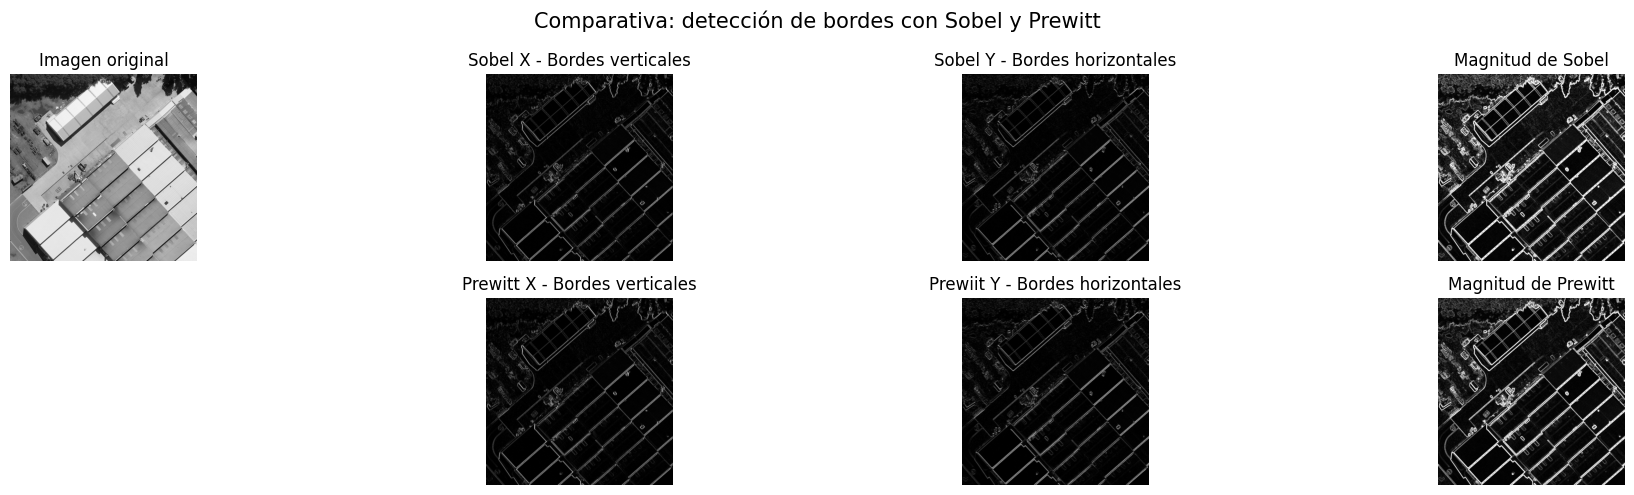

In [ ]:
# Comparativa
# Filtro de Sobel
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_magnitud = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_magnitud = np.uint8(np.clip(sobel_magnitud, 0, 255))

# Filtro Prewitt
kernel_prewitt_x = np.array([[-1, 0, 1],
                             [-1, 0, 1],
                             [-1, 0, 1]])

kernel_prewitt_y = np.array([[-1, -1, -1],
                             [ 0, 0, 0],
                             [1, 1, 1]])

prewitt_x = convolve(gray.astype(np.float32), kernel_prewitt_x)
prewitt_y = convolve(gray.astype(np.float32), kernel_prewitt_y)
prewitt_magnitude = np.sqrt(prewitt_x**2 + prewitt_y**2)
prewitt_magnitude = np.uint8(np.clip(prewitt_magnitude, 0, 255))

# Visualización
plt.figure(figsize = (20,5))

# Imagen original
plt.subplot(2, 4, 1)
plt.imshow(gray, cmap = 'gray')
plt.title('Imagen original')
plt.axis('off')

# Sobel
plt.subplot(2, 4, 2)
plt.imshow(np.abs(sobel_x), cmap = 'gray')
plt.title('Sobel X - Bordes verticales')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(np.abs(sobel_y), cmap = 'gray')
plt.title('Sobel Y - Bordes horizontales')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(sobel_magnitud, cmap = 'gray')
plt.title('Magnitud de Sobel')
plt.axis('off')

# Prewitt
plt.subplot(2, 4, 6)
plt.imshow(np.abs(prewitt_x), cmap = 'gray')
plt.title('Prewitt X - Bordes verticales')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(np.abs(prewitt_y), cmap = 'gray')
plt.title('Prewiit Y - Bordes horizontales')
plt.axis('off')

plt.subplot(2, 4, 8)
plt.imshow(prewitt_magnitude, cmap = 'gray')
plt.title('Magnitud de Prewitt')
plt.axis('off')

plt.suptitle('Comparativa: detección de bordes con Sobel y Prewitt', fontsize = 15)
plt.tight_layout()
plt.show()

In [ ]:
# Roberts
# Kernel de Roberts (2x2)
kernel_roberts_x = np.array([[1, 0],
                             [0, -1]], dtype = np.float32)

kernel_roberts_y = np.array([[0, 1],
                             [-1, 0]], dtype = np.float32)

# Aplicar convolución
Gx = cv2.filter2D(gray, cv2.CV_64F, kernel_roberts_x)
Gy = cv2.filter2D(gray, cv2.CV_64F, kernel_roberts_y)

# Calcular la magnitud del gradiente
G = np.sqrt(Gx**2 + Gy**2)
G = np.uint8(np.clip(G, 0, 255))

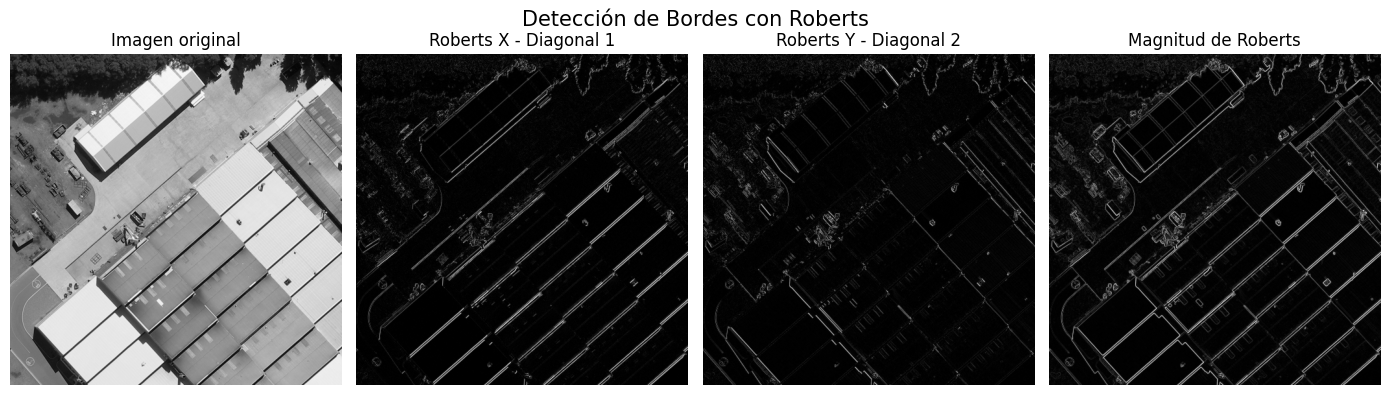

In [ ]:
plt.figure(figsize = (14, 4))

plt.subplot(1, 4, 1)
plt.imshow(gray, cmap = 'gray')
plt.title('Imagen original')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(np.abs(Gx), cmap = 'gray')
plt.title('Roberts X - Diagonal 1')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(np.abs(Gy), cmap = 'gray')
plt.title('Roberts Y - Diagonal 2')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(G, cmap = 'gray')
plt.title('Magnitud de Roberts')
plt.axis('off')

plt.suptitle('Detección de Bordes con Roberts', fontsize = 15)
plt.tight_layout()
plt.show()